In [1]:
# download packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

# download datasets
mql = pd.read_csv('data/olist_marketing_qualified_leads_dataset.csv') # mql list
closed_deals = pd.read_csv('data/olist_closed_deals_dataset.csv') # mqls that converted to Olist customers
order_items = pd.read_csv('data/olist_order_items_dataset.csv') # products sold
sellers = pd.read_csv("data/olist_sellers_dataset.csv") # info about sellers

In [2]:
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [3]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

## Visualizations

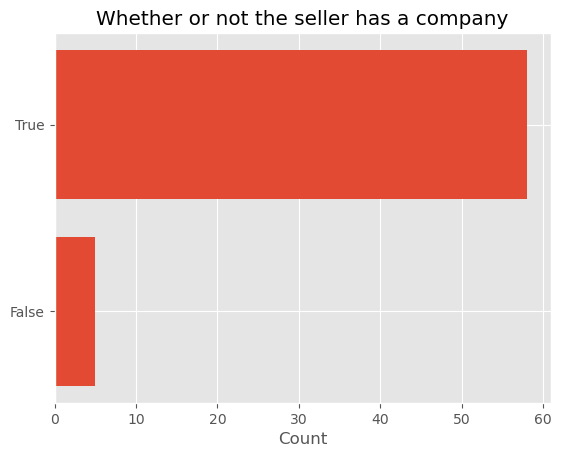

In [4]:
# for categories
plt.barh(y=closed_deals['has_company'].value_counts().index[::-1], width=closed_deals['has_company'].value_counts()[::-1])
plt.yticks(ticks=[1,0], labels=["True", "False"])
plt.xlabel("Count")
plt.title("Whether or not the seller has a company")
# save plot
plt.savefig('figures/has_company.png')
plt.show()

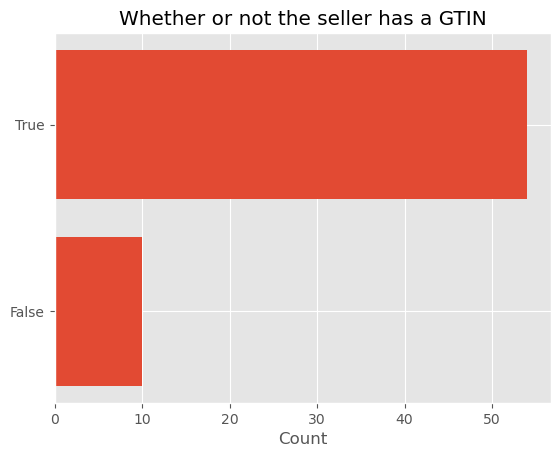

In [5]:
plt.barh(y=closed_deals['has_gtin'].value_counts().index[::-1], width=closed_deals['has_gtin'].value_counts()[::-1])
plt.yticks(ticks=[1,0], labels=["True", "False"])
plt.xlabel("Count")
plt.title("Whether or not the seller has a GTIN")
plt.show()

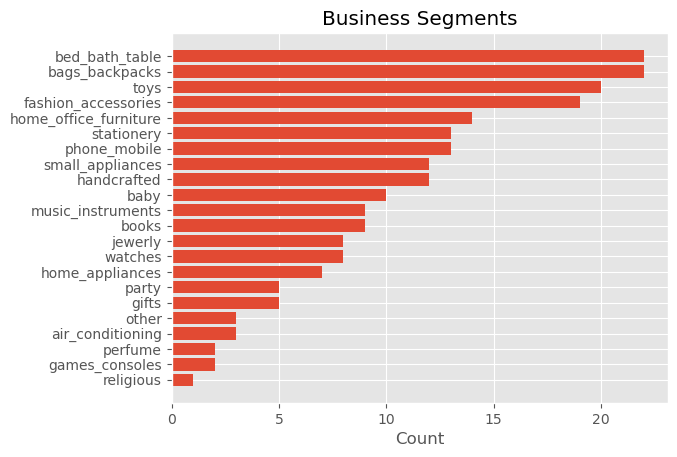

In [6]:
plt.barh(y=closed_deals['business_segment'].value_counts().index[:10:-1], width=closed_deals['business_segment'].value_counts()[:10:-1])
plt.xlabel("Count")
plt.title("Business Segments")
# save plot
plt.savefig('figures/business_segment.png', bbox_inches="tight")
plt.show()

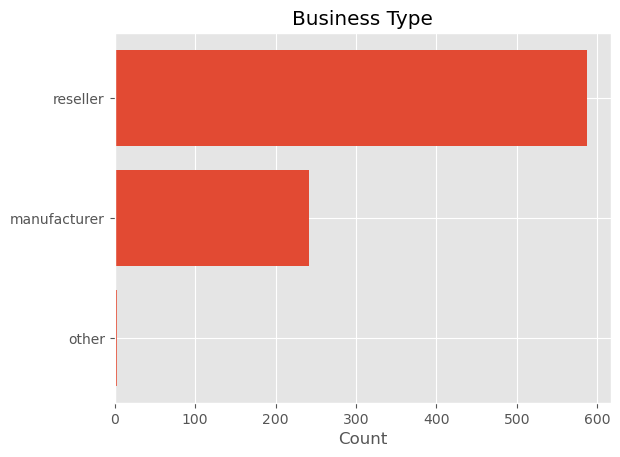

In [57]:
plt.barh(y=closed_deals['business_type'].value_counts().index[::-1], width=closed_deals['business_type'].value_counts()[::-1])
plt.xlabel("Count")
plt.title("Business Type")
plt.show()

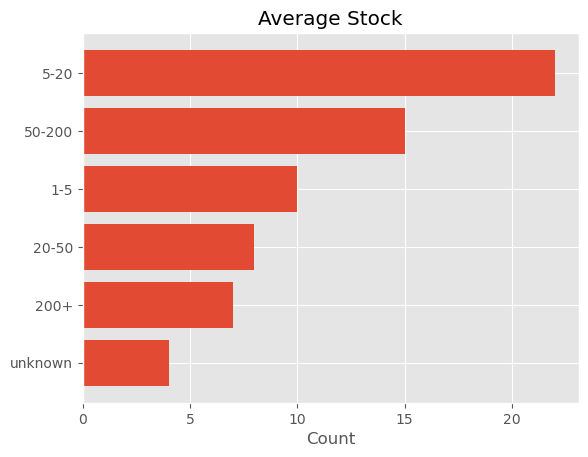

In [59]:
plt.barh(y=closed_deals['average_stock'].value_counts().index[::-1], width=closed_deals['average_stock'].value_counts()[::-1])
plt.xlabel("Count")
plt.title("Average Stock")
plt.show()

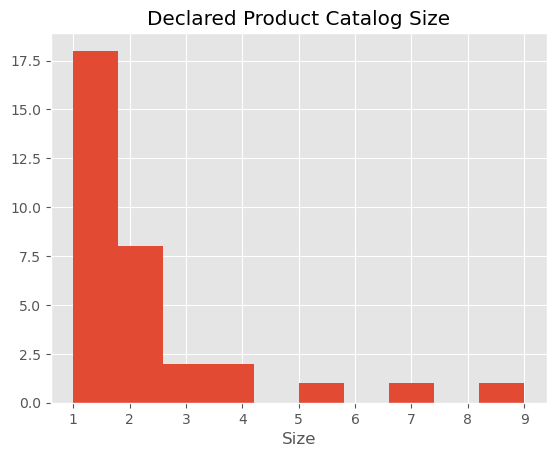

In [62]:
plt.hist(x=closed_deals['declared_product_catalog_size'].value_counts(), bins=10)
plt.xlabel("Size")
plt.title("Declared Product Catalog Size")
plt.show()

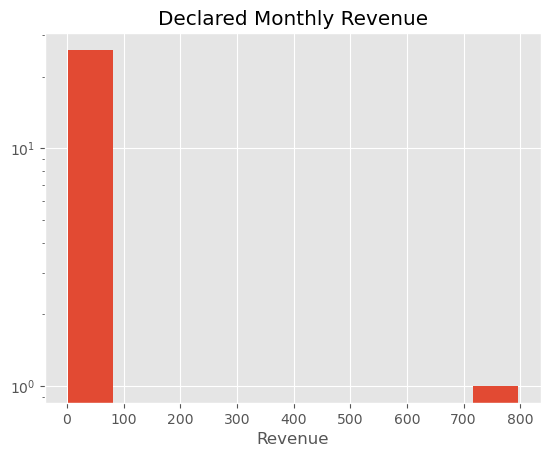

In [68]:
plt.hist(x=closed_deals['declared_monthly_revenue'].value_counts())
plt.yscale('log')
plt.xlabel("Revenue")
plt.title("Declared Monthly Revenue")
plt.show()

In [67]:
closed_deals['declared_monthly_revenue'].value_counts()

0.0           797
100000.0        5
20000.0         3
30000.0         3
10000.0         3
25000.0         3
15000.0         2
120000.0        2
50000.0         2
60000.0         2
300000.0        2
5000.0          2
250000.0        2
210000.0        1
8000000.0       1
40000.0         1
50000000.0      1
4000.0          1
150000.0        1
6.0             1
1000.0          1
180000.0        1
500000.0        1
130000.0        1
6000.0          1
8000.0          1
200000.0        1
Name: declared_monthly_revenue, dtype: int64